# SML CT3 MPA

### Data_set:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

1. id = listing ID
2. name = name of the listing
3. host_id = host ID
4. host_name = name of the host
5. neighbourhood_group = location
6. neighbourhood = area
7. latitude = latitude coordinates
8. longitude = longitude coordinates
9. room_type = listing space type
10. price = price in dollars (Target variable)
11. minimum_nights = amount of nights minimum
12. number_of_reviews = number of reviews
13. last_review = latest review
14. reviews_per_month = number of reviews per month
15. calculated_host_listings_count = amount of listing per host
16. availability_365 = number of days when listing is available for booking

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset)






In [ ]:
# Kindly change the below cells from markdown to code and execute it

import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head()


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"
import collections
import itertools
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import resample
from xgboost import XGBRegressor

### 2.	Data Understanding
#### Summarize important observations from the data set (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


The number of rows are 1054 and Columns are 16

Numerical  Count are   :10
Categorical  Count are : 6

Numerical  are   :['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical  are : ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
                 id       host_id     latitude    longitude        price  \
count  1.054000e+03  1.054000e+03  1054.000000  1054.000000  1054.000000   
mean   1.911356e+07  6.652685e+07    40.728377   -73.951802   149.699241   
std    1.096046e+07  7.757195e+07     0.056092     0.049034   156.239782   
min    1.229900e+04  2.787000e+03    40.499790   -74.240840    10.000000   
25%    9.391594e+06  6.983334e+06    40.689253   -73.983770    70.000000   
50%    1.997263e+07  3.013617e+07    40.721665   -73.956930   104.000000   
75%    2.929557e+07  1.074344e+08    40.761120   -73.935523   179.000000

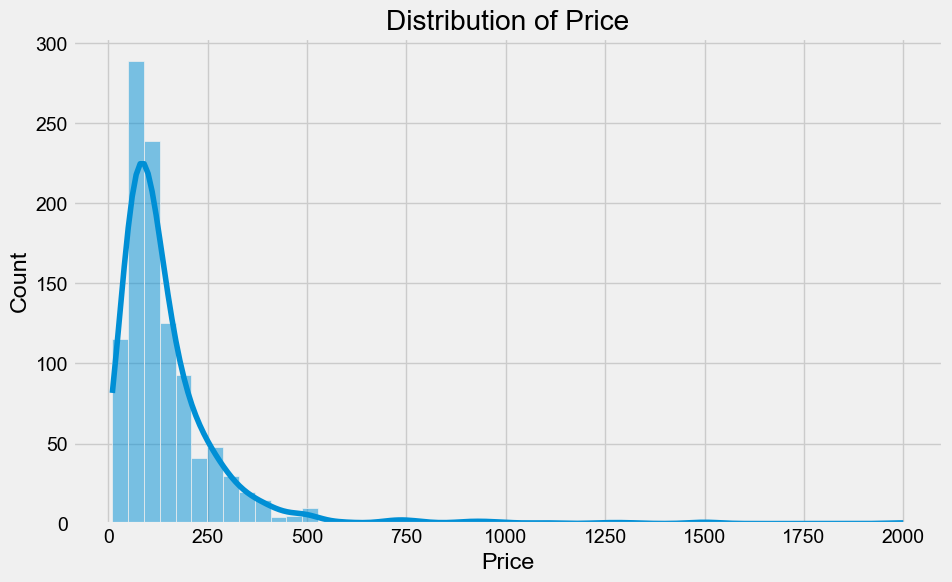

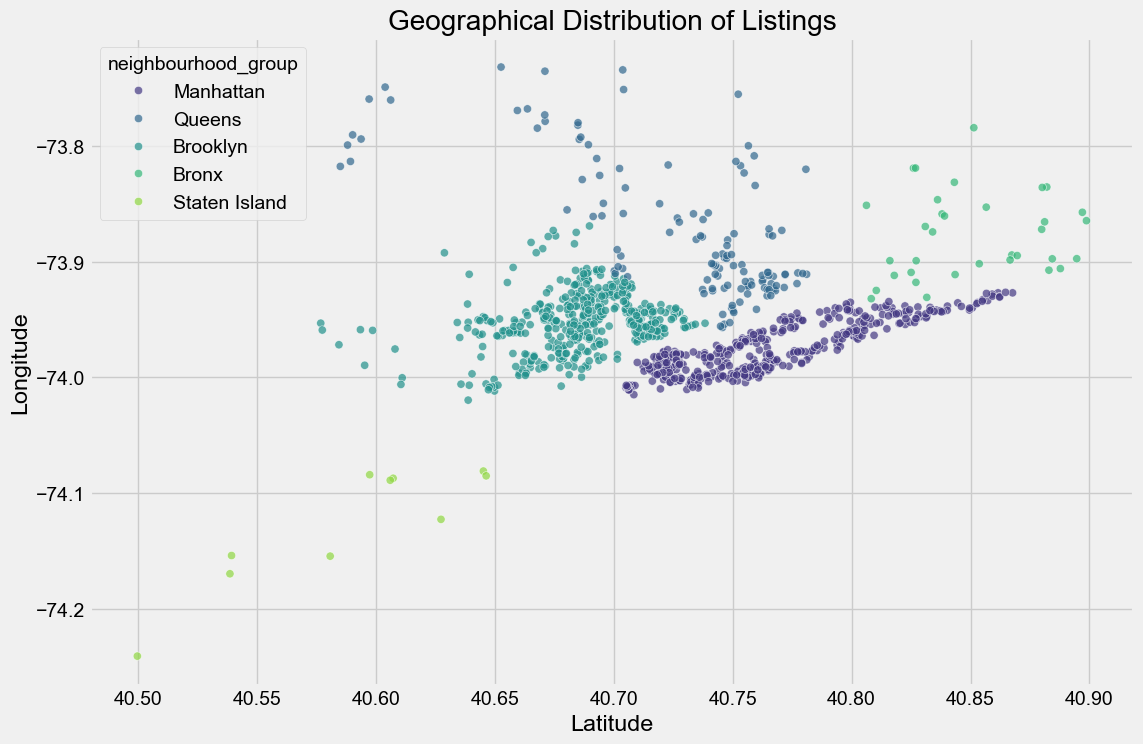

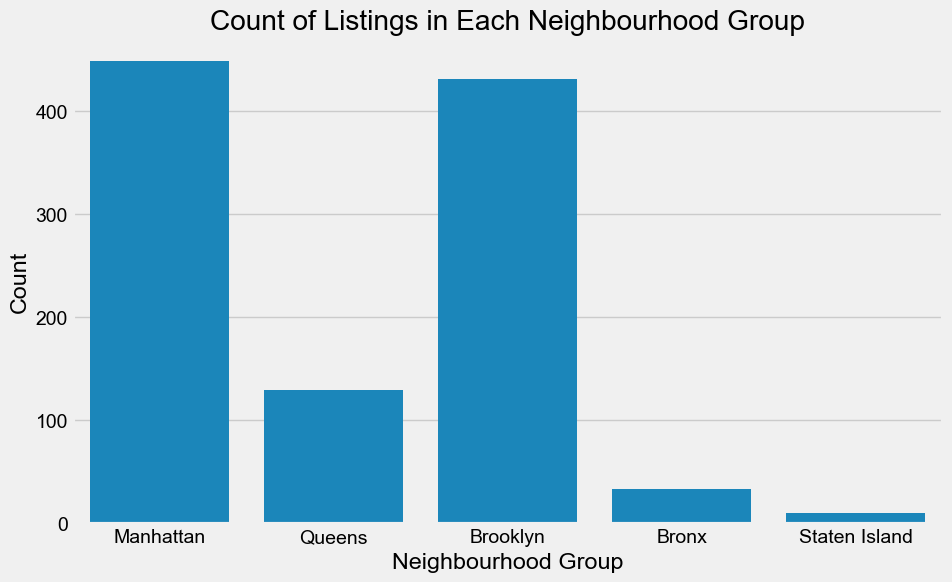

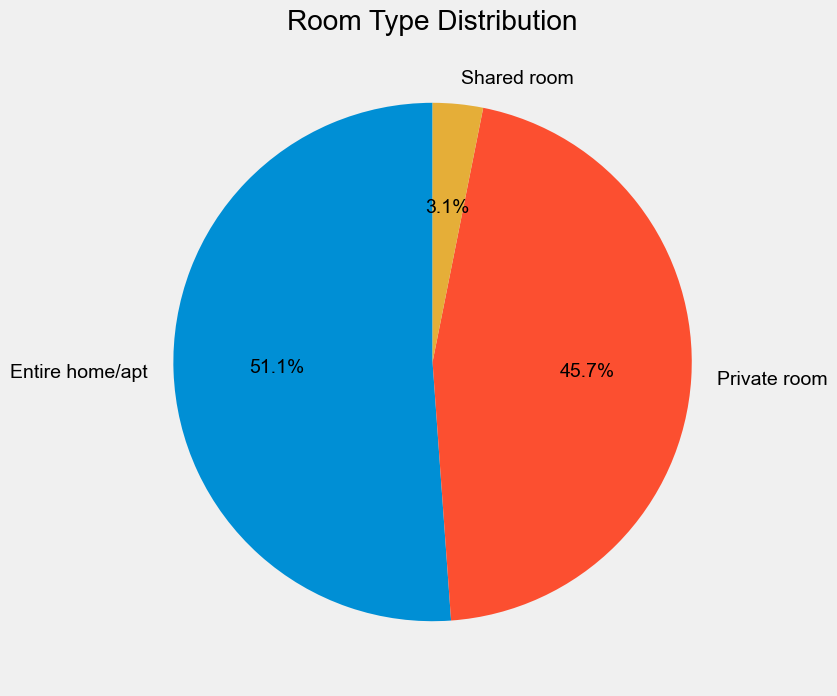

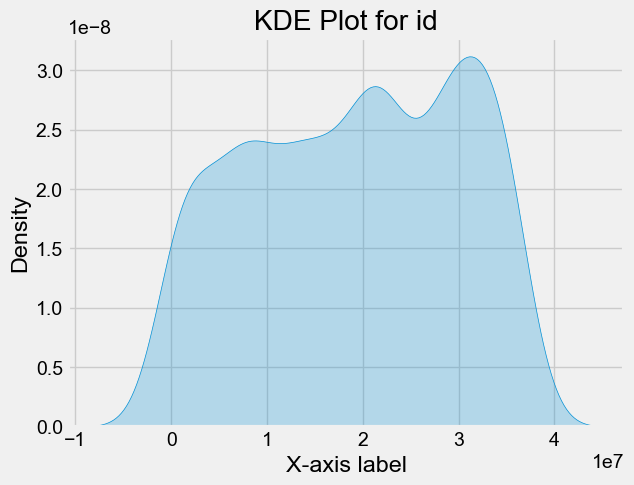

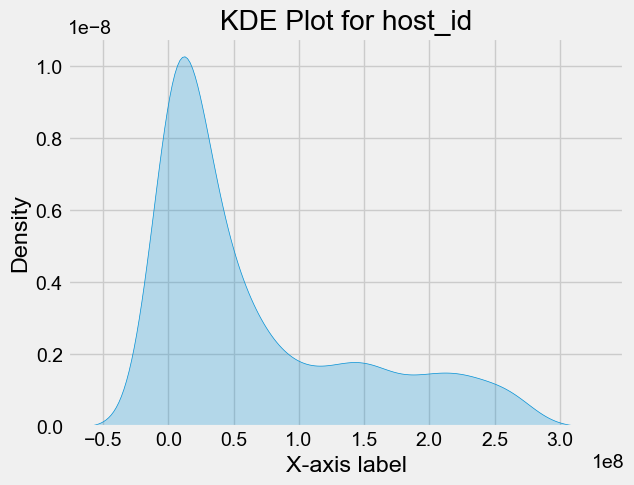

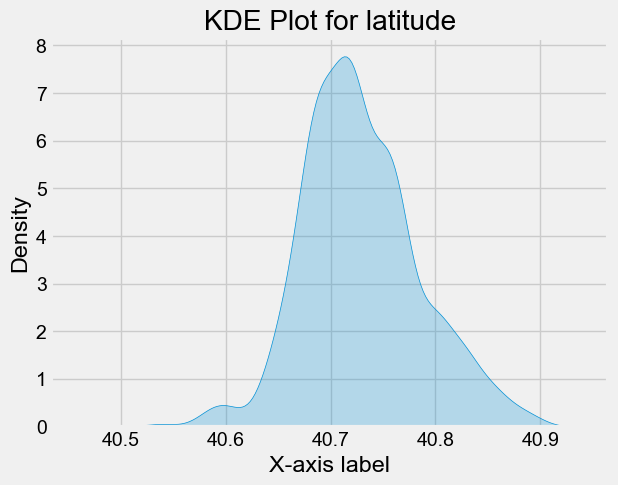

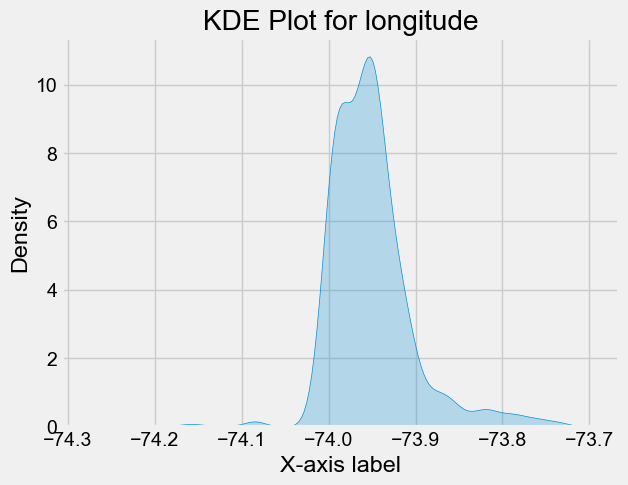

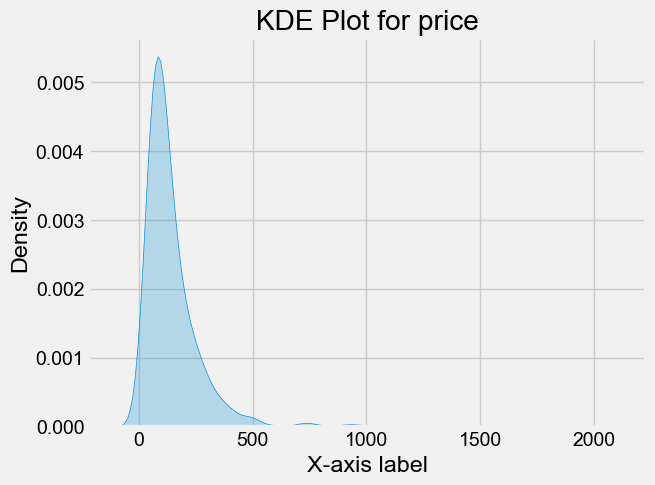

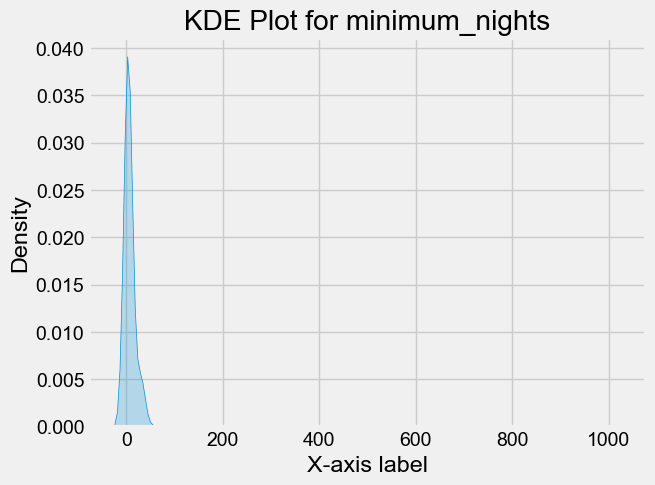

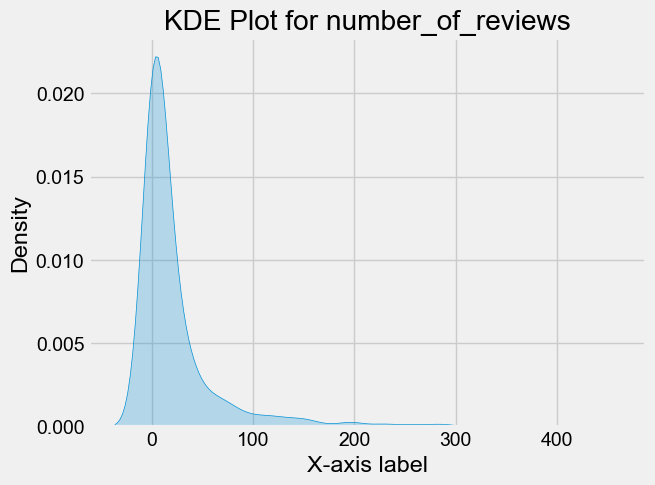

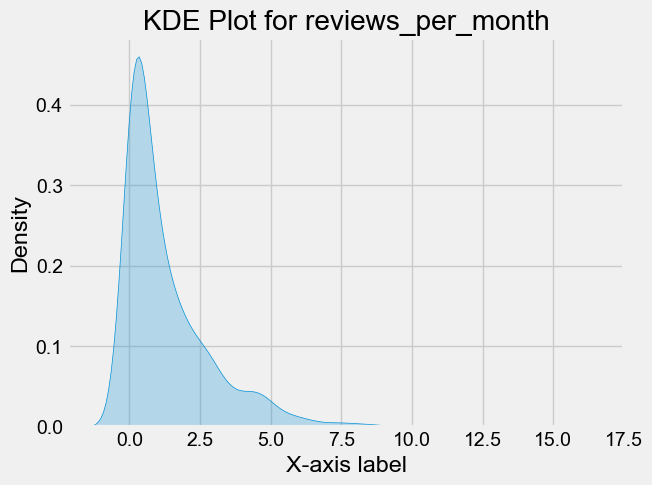

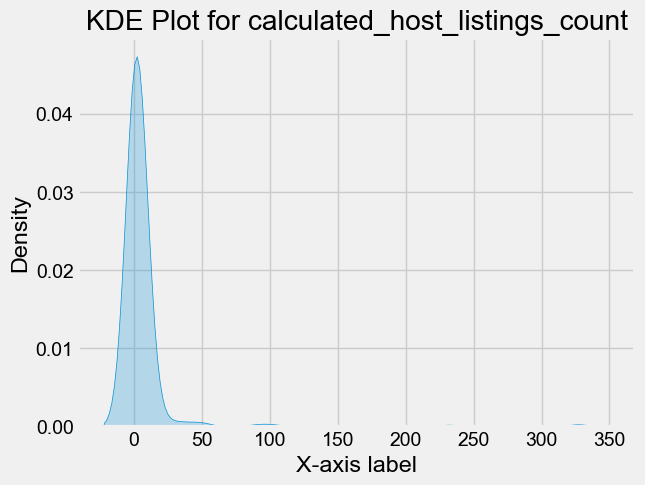

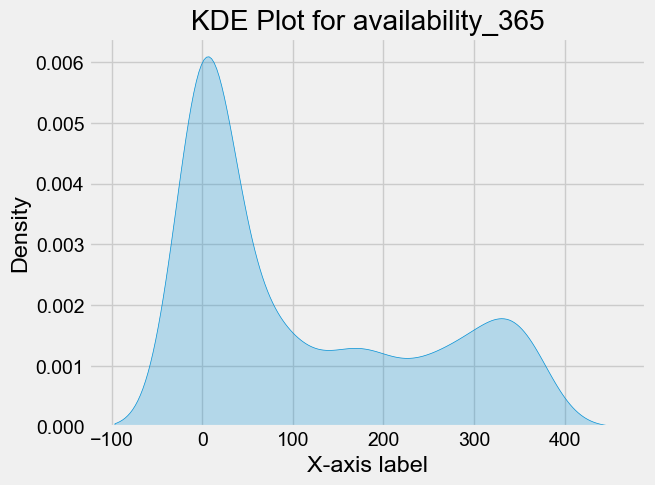

In [3]:
## Kindly change the below cells from markdown to code and execute it
df=pd.read_csv("new_york_city_air.csv")
df1=df
# What are the number of rows; no. & types of variables (continuous, categorical etc.)
nRows,nCols = df.shape
print(f'The number of rows are {nRows} and Columns are {nCols}')
#Numerical and Categorial Values 
numerical=df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical= df.select_dtypes(include='object').columns.to_list()

print(f'\nNumerical  Count are   :{len(numerical)}')
print(f'Categorical  Count are : {len(categorical)}\n')
print(f'Numerical  are   :{numerical}')
print(f'Categorical  are : {categorical}')

#b.Calculate five point summary for numerical variables
five_number_summary = df.describe(percentiles=[.25, .5, .75])
print(five_number_summary)

#c Summarize observations for categorical variables – no. of categories, % observations in each category
for col in categorical:
    print(f"Summary for '{col}':")
    print(df[col].value_counts())
    print("\nPercentage of observations in each category:")
    print(df[col].value_counts(normalize=True) * 100)
    print("\n")
    
# Below are the analyses i have chosen
# Distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

#Geographical Graph of latitude and latitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='latitude',y='longitude', data=df1, hue='neighbourhood_group', palette='viridis', alpha=0.7)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Count plot for 'neighbourhood_group'
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df1)
plt.title('Count of Listings in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')

#Pie Chart Of Categorical Variable room_type
status_distribution = df1['room_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(status_distribution, labels=status_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Room Type Distribution')
plt.show()

#kde Plot of numerical variables
for column in numerical:
    plt.figure()
    sns.kdeplot(df1[column], fill=True)
    plt.title(f'KDE Plot for {column}')
    plt.xlabel('X-axis label')
    plt.ylabel('Density')
    plt.show()

### 3.	Data Preparation
#### Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not?


Dropped Columns :['id', 'name', 'host_id', 'host_name']
Unique value counts for neighbourhood_group:
neighbourhood_group
Manhattan        449
Brooklyn         431
Queens           130
Bronx             34
Staten Island     10
Name: count, dtype: int64

Unique value counts for neighbourhood:
neighbourhood
Williamsburg          92
Bedford-Stuyvesant    76
Bushwick              53
Upper West Side       49
Hell's Kitchen        46
                      ..
Tribeca                1
Kew Gardens            1
Morris Park            1
Randall Manor          1
Huguenot               1
Name: count, Length: 123, dtype: int64

Dropped column neighbourhood
Unique value counts for last_review:
last_review
01-07-2019    32
24-06-2019    29
30-06-2019    27
23-06-2019    26
07-07-2019    25
              ..
23-02-2019     1
14-09-2016     1
20-05-2019     1
04-07-2016     1
07-10-2018     1
Name: count, Length: 360, dtype: int64

Dropped column last_review
Categorical Columns are :['neighbourhood_group'

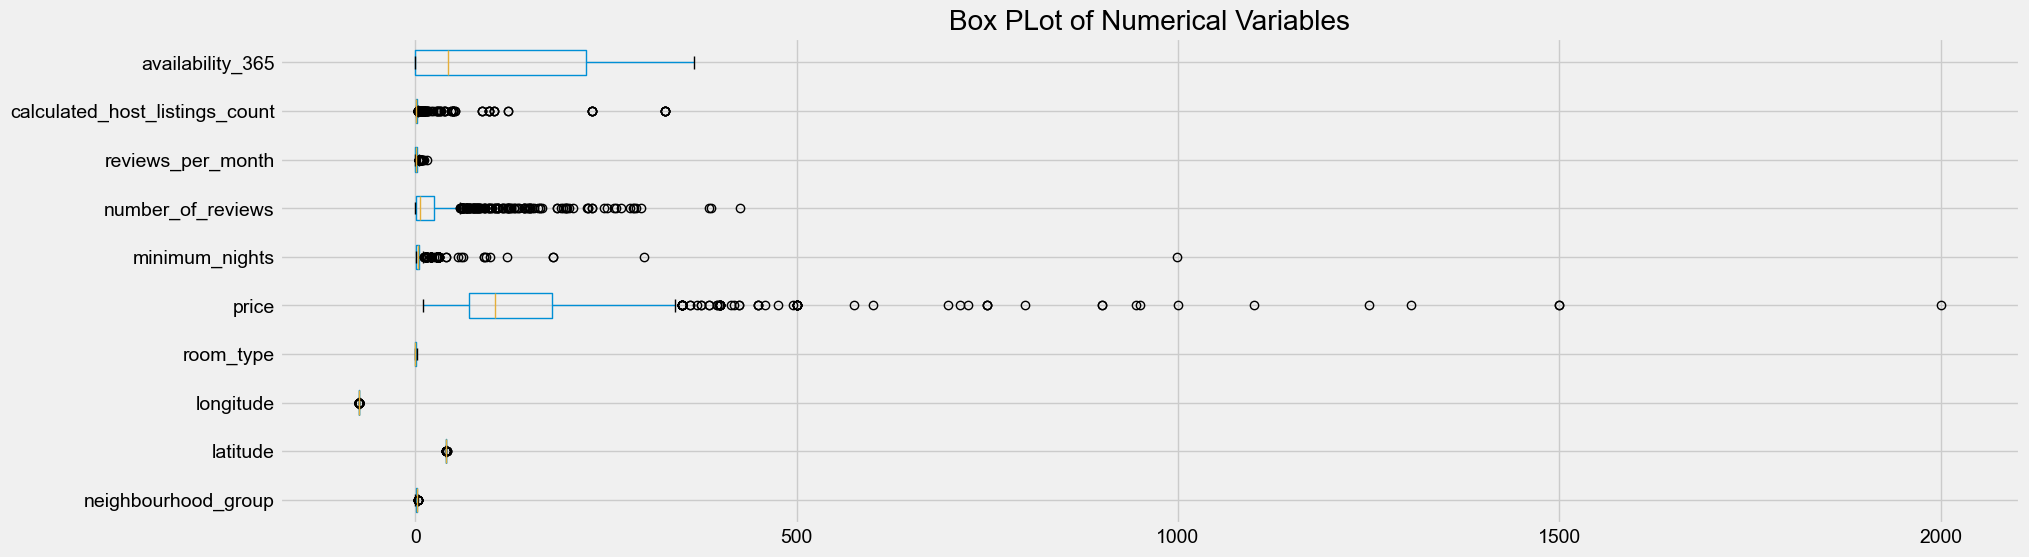

Skewness neighbourhood_group: 0.3411919218332452
Skewness latitude: 0.25703417390533895
Skewness longitude: 0.9878346284260408


C:\Users\vigne\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Skewness room_type: 0.4605838811306319
Skewness price: 4.981155542768506
Skewness minimum_nights: 23.322089752532857
Skewness number_of_reviews: 3.7131116161914086
Skewness reviews_per_month: 2.4308933682122706
Skewness calculated_host_listings_count: 8.233808107546356
Skewness availability_365: 0.7598883201948172


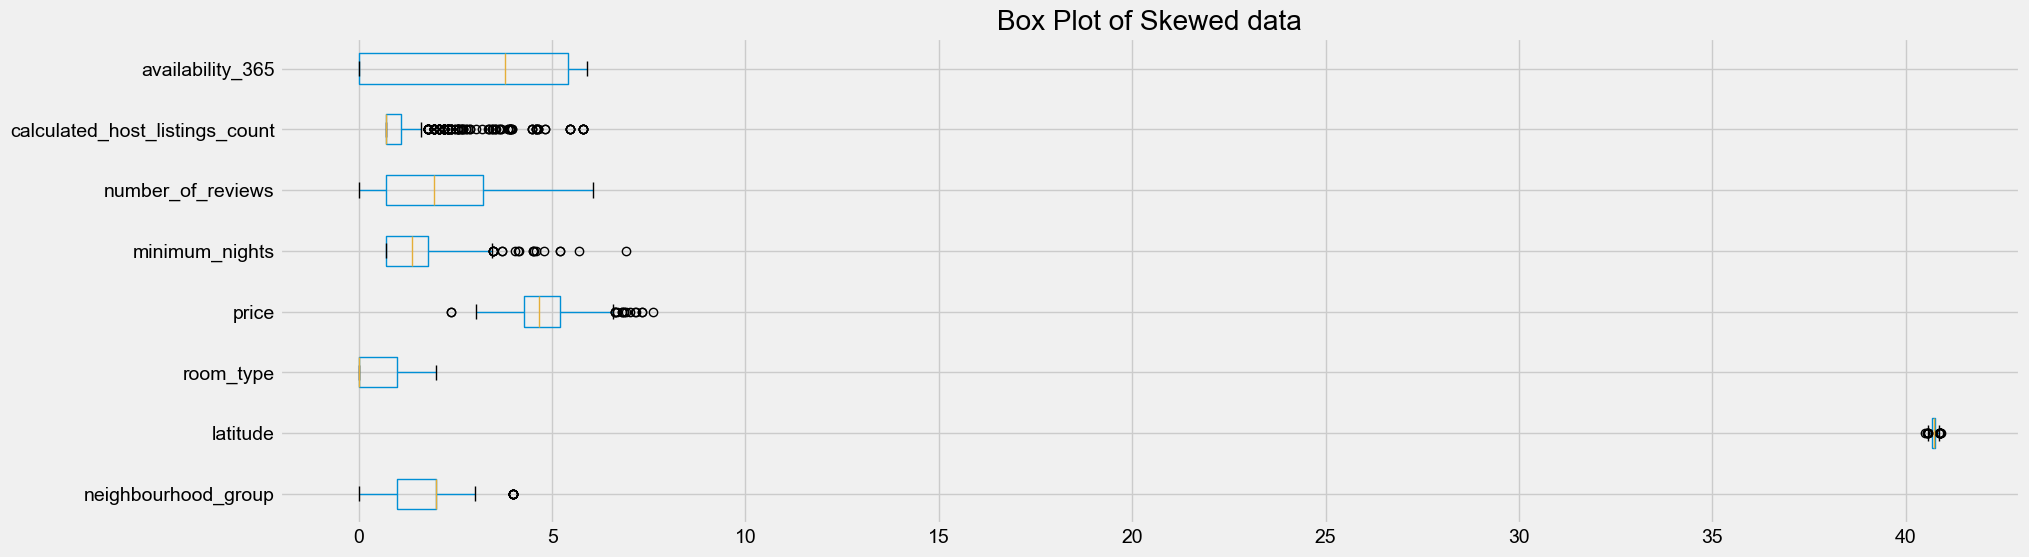

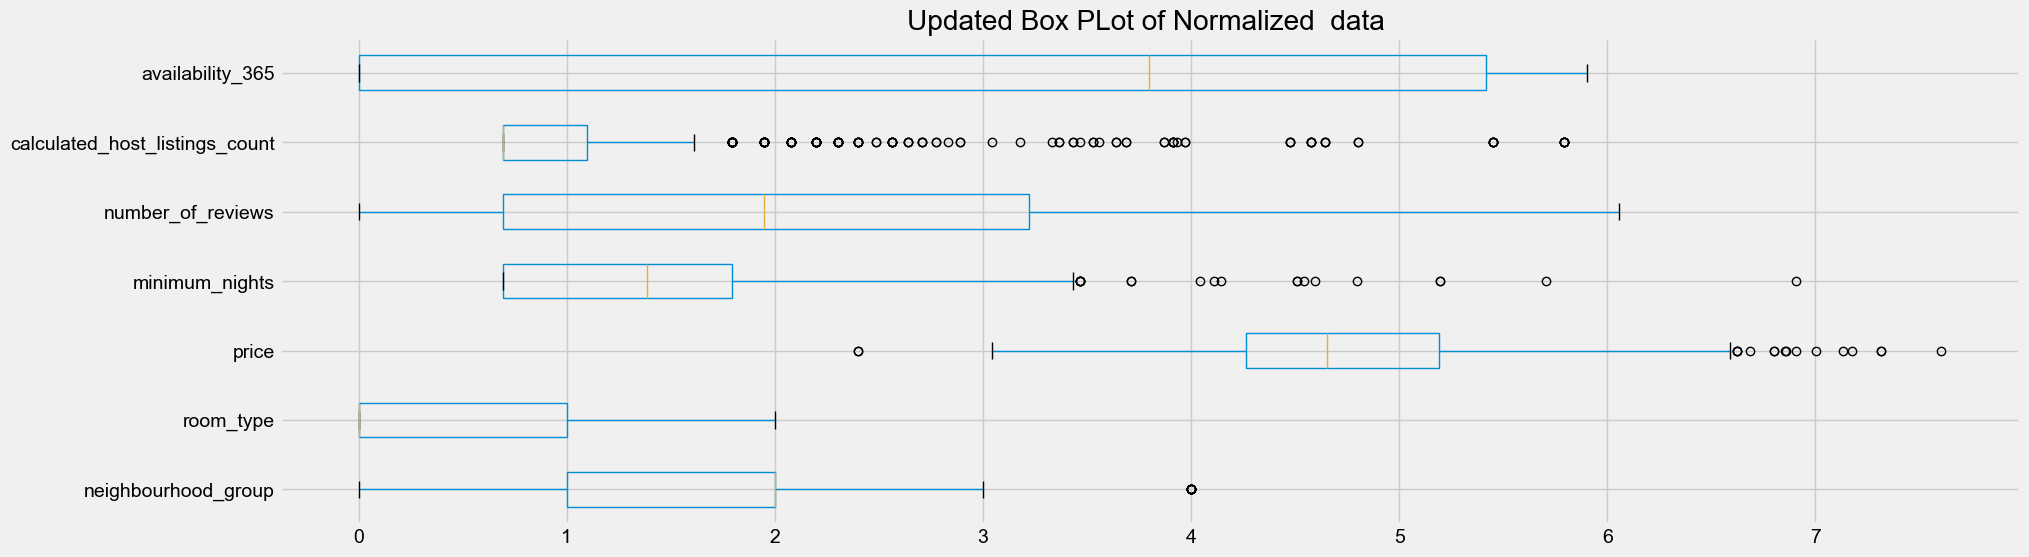

['calculated_host_listings_count', 'availability_365', 'number_of_reviews', 'minimum_nights', 'price']


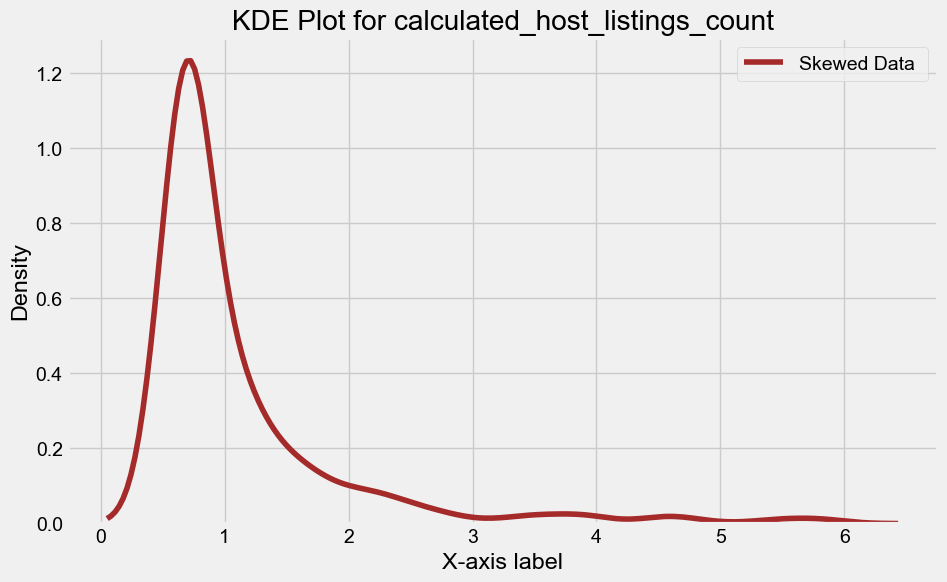

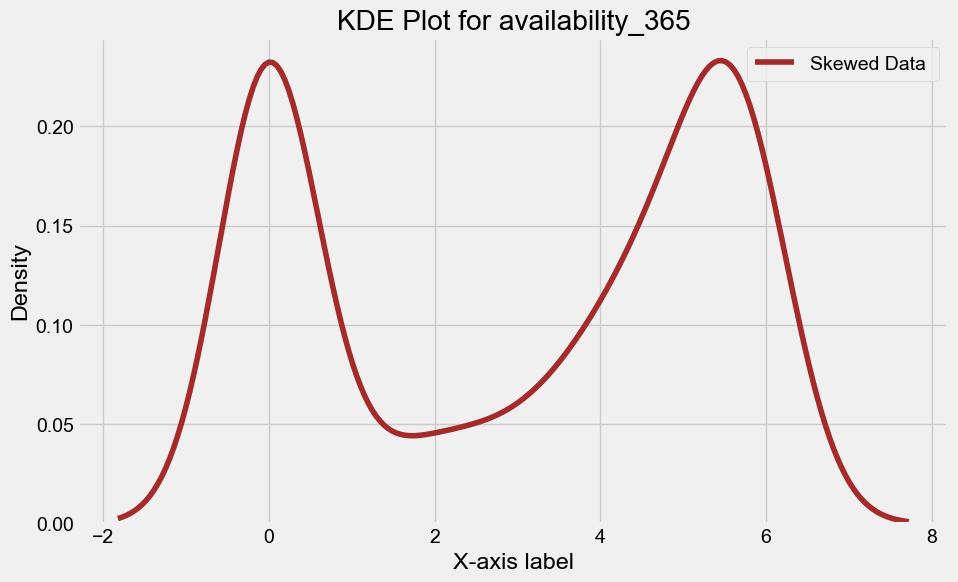

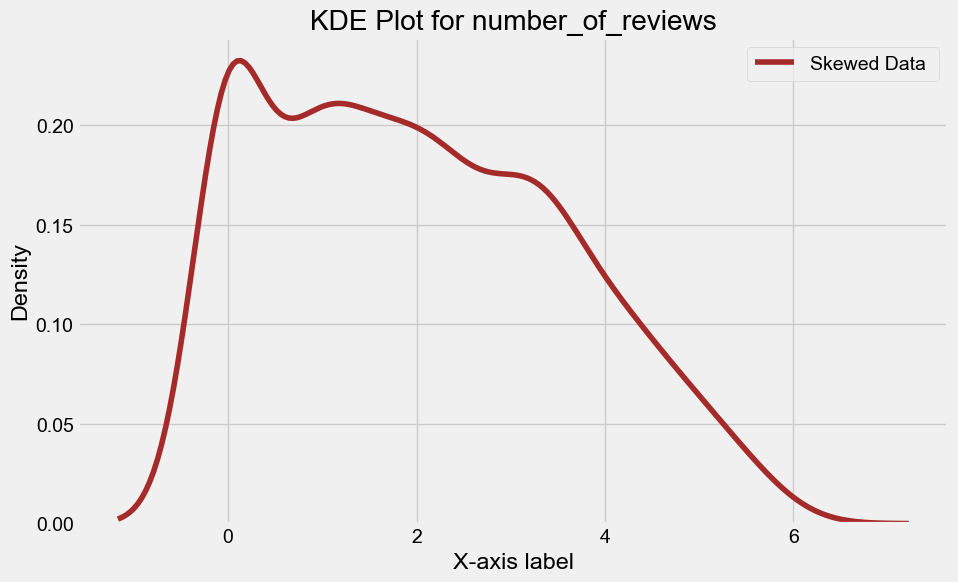

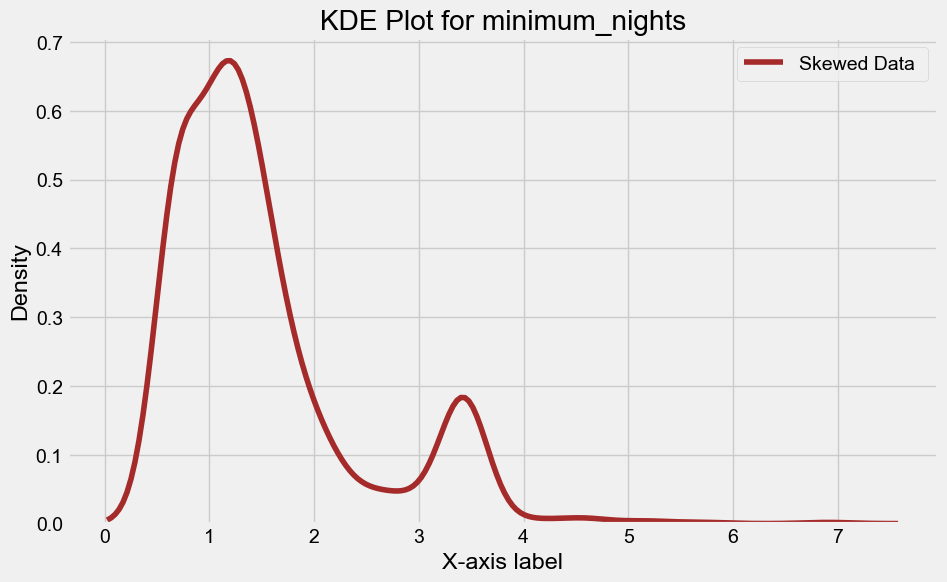

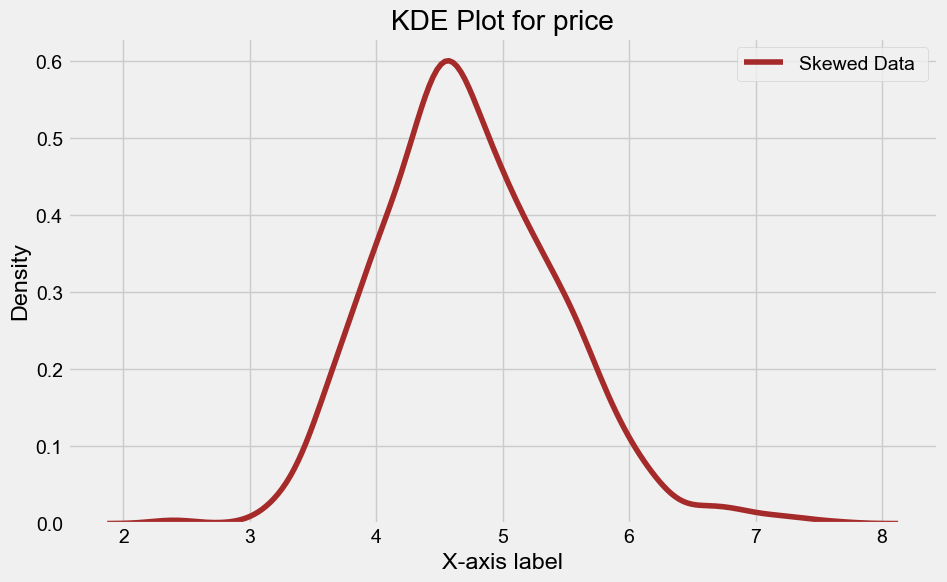

In [4]:
#Drop the unwanted columns 
columns_to_drop = ['id', 'name','host_id','host_name']
df1 = df1.drop(columns=columns_to_drop)
print(f'Dropped Columns :{columns_to_drop}')

#Numerical and Categrical Data types
numerical_variables=df1.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_variables =df1.select_dtypes(include='object').columns.to_list()
df2=df1

#Perform Categorical Analysis to remove and Replace the values

for column in categorical_variables:
    unique_values =df2[column].unique()
    unique_value_counts = df2[column].value_counts()

    #print(f'Unique values for {column}: {unique_values}')
    print(f'Unique value counts for {column}:\n{unique_value_counts}\n')

    if(len(unique_values)>=10):
        df2.drop(column, axis=1, inplace=True)
        categorical_variables.remove(column)
        print(f'Dropped column {column}')
        
print(f'Categorical Columns are :{categorical_variables}')  

#Enoding values 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in categorical_variables:
    df2[column] = encoder.fit_transform(df2[column])
#Box PLot of Numerical Variables
plt.figure(figsize=(20, 6))
plt.title("Box PLot of Numerical Variables")
df2.boxplot(vert=False)
plt.show()

# Copying df2 to Skewed Data Frame 
skewed_df3=pd.DataFrame(df2)

#Make data Normally distributed based on skewnesis
for column in skewed_df3.columns:
    skewness = skewed_df3[column].skew()
    print(f'Skewness {column}: {skewness}')

    if abs(skewness) > 0.5:
        # Apply log transformation if the skewness is greater than 0.5 (you can adjust this threshold)
        skewed_df3[column] = np.log1p(skewed_df3[column])
    else:
        # If skewness is not significant, leave the column unchanged in df2
        skewed_df3[column] = skewed_df3[column]
        
#Drop Empty column        
skewed_df3.dropna(axis=1, inplace=True)

#Box Plot of Skewed Data
plt.figure(figsize=(20, 6))
skewed_df3.boxplot(vert=False)
plt.title("Box Plot of Skewed data")
plt.show()

#Droppiing unwanted data based on box plot
skewed_df3.drop('latitude',axis=1, inplace=True)

#Updated Box PLot of Skewed data 
plt.figure(figsize=(20, 6))
skewed_df3.boxplot(vert=False)
plt.title("Updated Box PLot of Normalized  data ")
plt.show()

#Assigning skewed_df3 to df3
df3=skewed_df3

#Kde for skewed data
skewed_columns=df3.columns.to_list()
common_values = list(set(skewed_columns) & set(numerical_variables)) 
print(common_values)
for column in common_values:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(skewed_df3[column] ,label='Skewed Data ', color='brown')
    plt.title(f'KDE Plot for {column}')
    plt.xlabel('X-axis label')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

### 4.	Summarize relationships among variables (5 marks)               
a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?




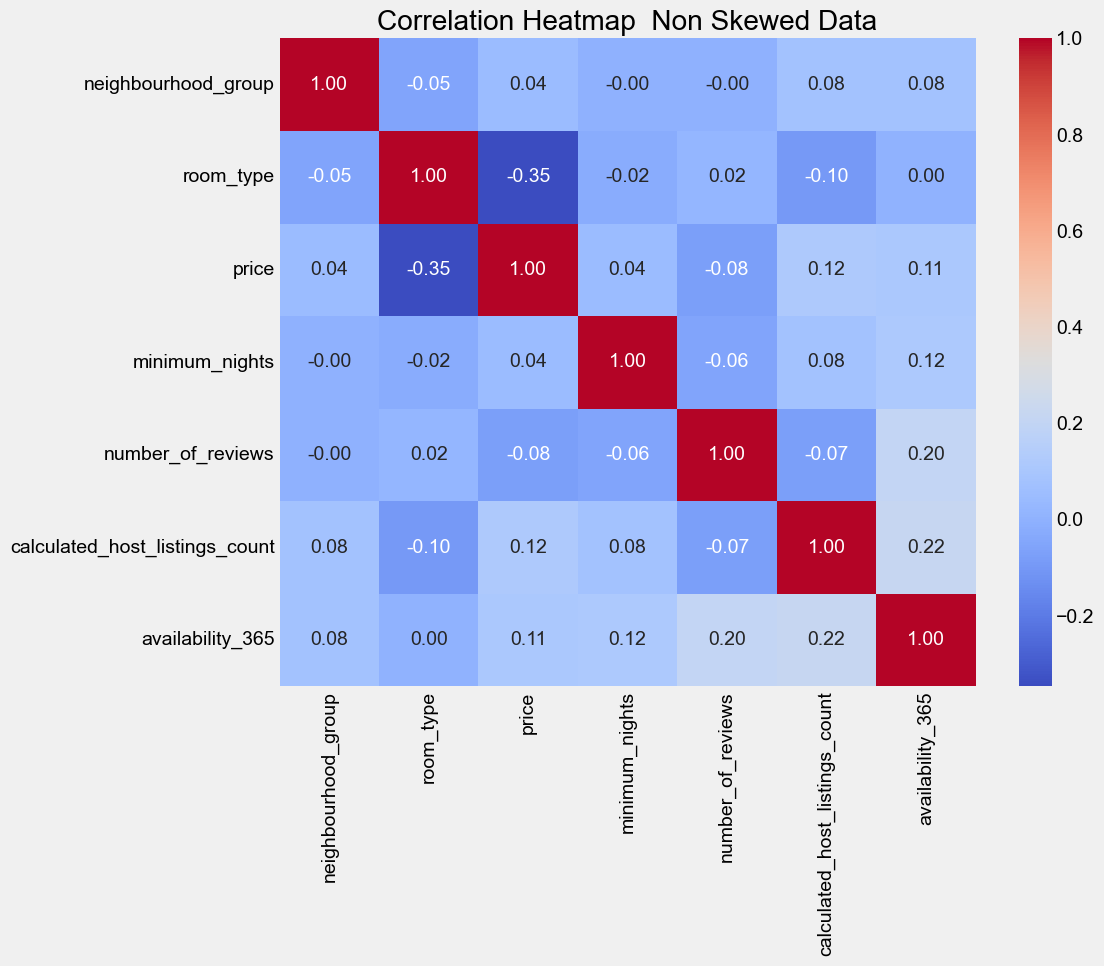

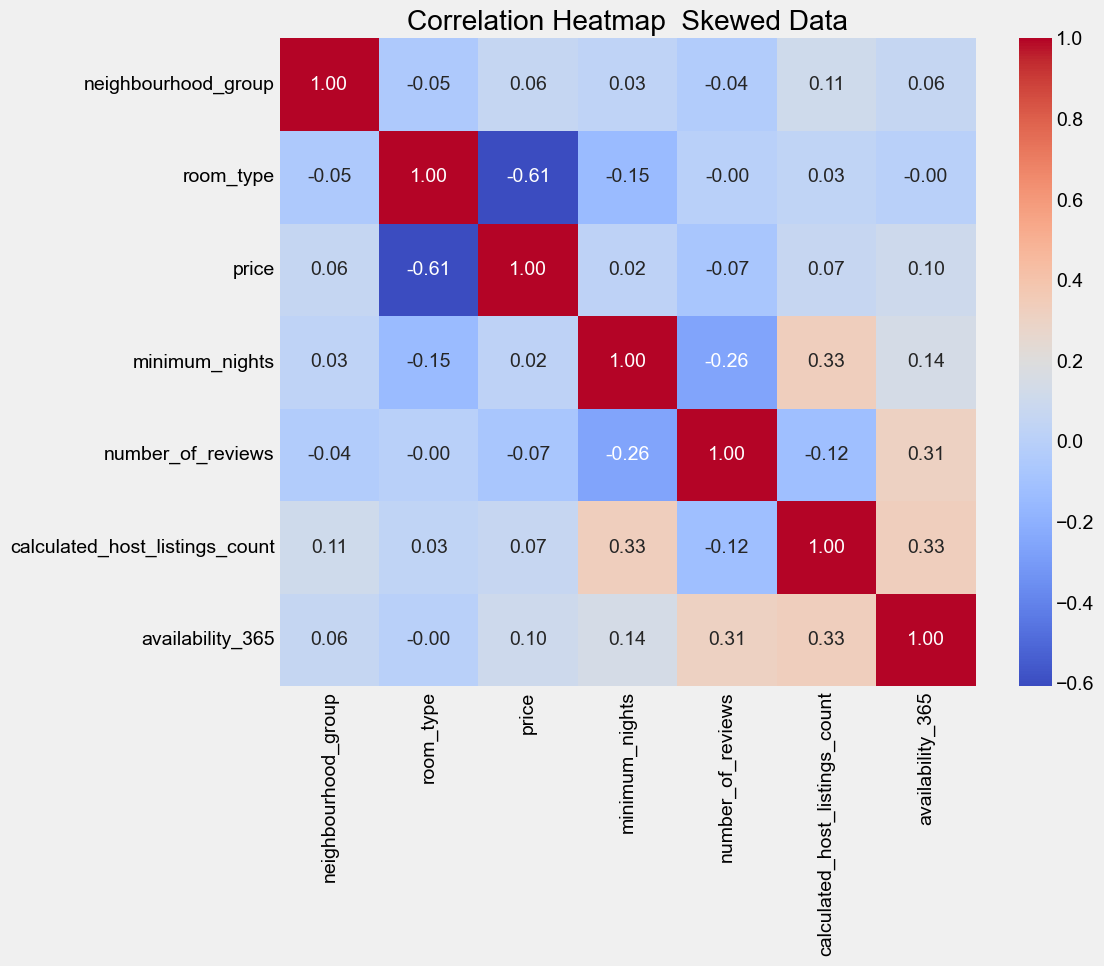

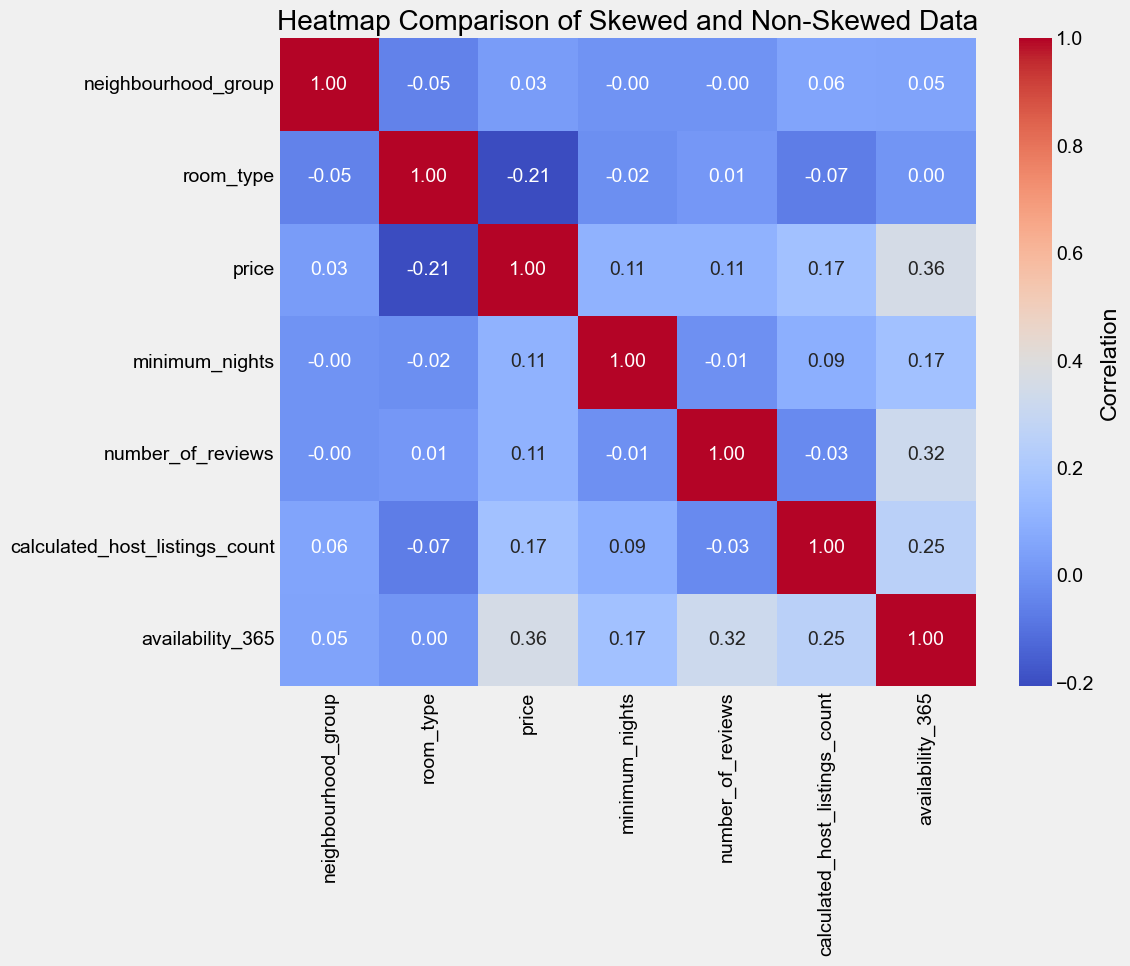

In [5]:
 #Correlation heatmap for numerical variables  Non Skewed Data
plt.figure(figsize=(10, 8))
sns.heatmap(df2[df3.columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap  Non Skewed Data')
plt.show()

# Correlation heatmap for numerical variables   Skewed Data
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap  Skewed Data')
plt.show()

#Correlation of combined data df3 and df2
df_combined = pd.concat([df3,df2[df3.columns]], keys=['Skewed', 'Non-Skewed'])
correlation_matrix = df_combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title("Heatmap Comparison of Skewed and Non-Skewed Data")
plt.show()

###  5.	Fit a base model. Please write your key observations (5 marks)

a. Fit the Linear Regression Model

b. What is the overall R2? Please comment on whether it is good or not.

c. Which variables are significant?

d. Calculate MSE, RMSE, MAE, MAPE.


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#X and Y variables
X=df3.drop('price',axis=1)
y = df3[['price']]

print("\nX Variables :",X.columns.to_list())
print("y variable  :",y.columns.to_list())

#Standard Scaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#test and train on 
print(f'\nscaler type : {scaler}')
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2, random_state=42)

#Shape of train and test data
print(f'\nX_train :{X_train.shape}')
print(f'y_train :{y_train.shape}')
print(f'\nX_test :{X_test.shape}')
print(f'y_test :{y_test.shape}')

##Model fit Linear regression
model=LinearRegression()
model.fit(X_train,y_train)

#Predict model
print(f'\nModel  :{model}')
y_pred=model.predict(X_test)

#R2 square value
r2 = r2_score(y_test, y_pred)
print(f'\nR-Squared Value on (R2) {scaler} : {r2}')
#'R2 value is Good'

# Check variable significance using statsmodels
X_train_with_intercept = sm.add_constant(X_train)
model_stats = sm.OLS(y_train, X_train_with_intercept).fit()
print('')
print(model_stats.summary())

# Calculate MSE, RMSE, MAE, MAPE.
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Print the result
print(f'\nMSE  - Mean Square Error {scaler}:{mse}')
print(f'RMSE - Root Mean Squared Error   {scaler} : {rmse}')
print(f'MAE  - Mean Absolute Error  {scaler}:{mae}')
print(f'MAPE - Mean Absolute Percentage Error  {scaler} : {mape}')


X Variables : ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
y variable  : ['price']

scaler type : StandardScaler()

X_train :(843, 6)
y_train :(843, 1)

X_test :(211, 6)
y_test :(211, 1)

Model  :LinearRegression()

R-Squared Value on (R2) StandardScaler() : 0.46137438854757484

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     93.80
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           5.20e-90
Time:                        11:05:43   Log-Likelihood:                -693.87
No. Observations:                 843   AIC:                             1402.
Df Residuals:                     836   BIC:                             1435.
Df

###6. Perform feature engineering using any of the listed techniques: Forward feature selection, backward elimination and recursive feature elimination and use the features to improvise the model and compare the results with the base model. (5 marks)

In [27]:
#Load Libraries RFE Recursive Feature Elimination 
from sklearn.feature_selection import RFE

#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Base Model -Linear Regression
base_model = LinearRegression()
base_model.fit(X_train, y_train)
base_predictions = base_model.predict(X_test)
base_rmse = mean_squared_error(y_test, base_predictions, squared=False)
print(f'\nBase Model :{base_model}')
print(f"Base Model RMSE: {base_rmse}")

# Choose the number of features to select
num_features_to_select = 3

# Create RFE model and select features
rfe_model = RFE(estimator=LinearRegression(), n_features_to_select=num_features_to_select)
rfe_model.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe_model.support_]
print("\nSelected Features:", selected_features)

# Fit a model using the selected features
rfe_X_train = rfe_model.transform(X_train)
rfe_X_test = rfe_model.transform(X_test)

rfe_model = LinearRegression()
rfe_model.fit(rfe_X_train, y_train)
rfe_predictions = rfe_model.predict(rfe_X_test)
rfe_rmse = mean_squared_error(y_test, rfe_predictions, squared=False)
print(f'\nREF Model :{rfe_model}')
print(f"RFE Model RMSE: {rfe_rmse}")

print(f"\nBase Model RMSE: {base_rmse}")
print(f"RFE Model RMSE: {rfe_rmse}")


Base Model :LinearRegression()
Base Model RMSE: 0.4943048022586591

Selected Features: Index(['room_type', 'minimum_nights', 'calculated_host_listings_count'], dtype='object')

REF Model :LinearRegression()
RFE Model RMSE: 0.49830086385617256

Base Model RMSE: 0.4943048022586591
RFE Model RMSE: 0.49830086385617256


###7. The prediction model output reliability can be improved using regularization techniques and parameter tuning. Perform regularization techniques and compare the results with the base model. (5 marks)

In [28]:
#load library of RIDGE
#Ridge Regression, also known as Tikhonov regularization or L2 regularization
from sklearn.linear_model import  Ridge

#Step 2: Fit Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base Model
base_model = LinearRegression()
base_model.fit(X_train_scaled, y_train)
base_predictions = base_model.predict(X_test_scaled)
base_rmse = mean_squared_error(y_test, base_predictions, squared=False)
print(f'\nBase Model :{base_model}')
print(f"Base Model RMSE: {base_rmse}")

#Regularized Model (Ridge Regression)
# You can tune the alpha parameter for Ridge regularization

alpha = 0.1
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
print(f'\nRidge Model :{ridge_model}')
print(f"Ridge Model RMSE: {ridge_rmse}")

#print the result
print(f"\nBase Model RMSE: {base_rmse}")
print(f"Ridge Model RMSE: {ridge_rmse}")


Base Model :LinearRegression()
Base Model RMSE: 0.4943048022586589

Ridge Model :Ridge(alpha=0.1)
Ridge Model RMSE: 0.4943012036116637

Base Model RMSE: 0.4943048022586589
Ridge Model RMSE: 0.4943012036116637
